## Introduction:
The field of medical research relies heavily on data analysis and modeling to make informed decisions and improve patient care. In this analysis, we have a dataset that represents a study conducted on patients suffering from the same illness. Each patient responded to one of five medications: Drug A, Drug B, Drug C, Drug X, or Drug Y. The objective is to build a model that can predict which drug would be suitable for future patients with the same illness based on their age, sex, blood pressure, and cholesterol levels. This dataset serves as a sample of a multiclass classifier problem, and we will utilize the training data to construct a decision tree model. The decision tree can then be employed to predict the appropriate medication for an unknown patient or to prescribe a drug to a new patient. This analysis holds the potential to enhance treatment outcomes and aid in personalized medicine.

* [Data Preprocessing](#section-one)
* [Decision Tree](#section-two)
    - [Categorical Features](#subsection-one)
    - [Visualizations](#anything-you-like)
* [Conclusion](#section-three)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [3]:
# Load the dataset
df = pd.read_csv('../input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')

<a id="section-one"></a>

## Data Preprocessing

#### This section will go over handling missing values as well as feature transformation

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

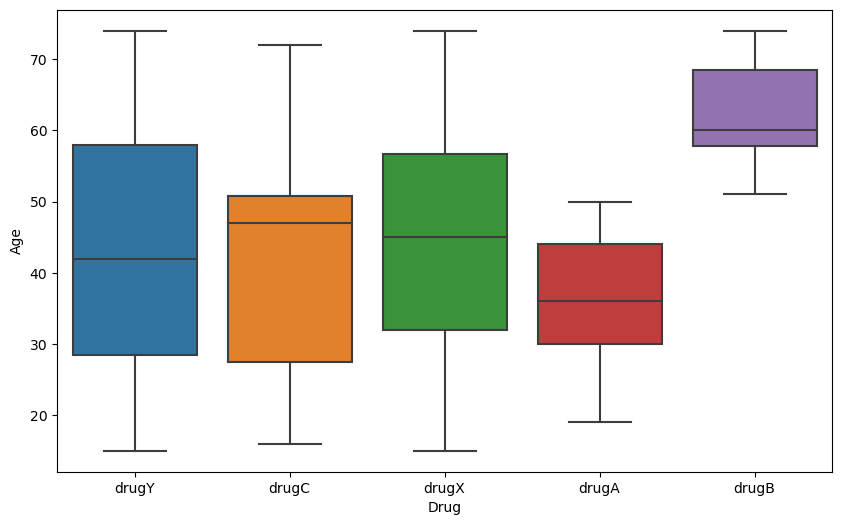

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x= "Drug", y="Age", data = df)
plt.show()

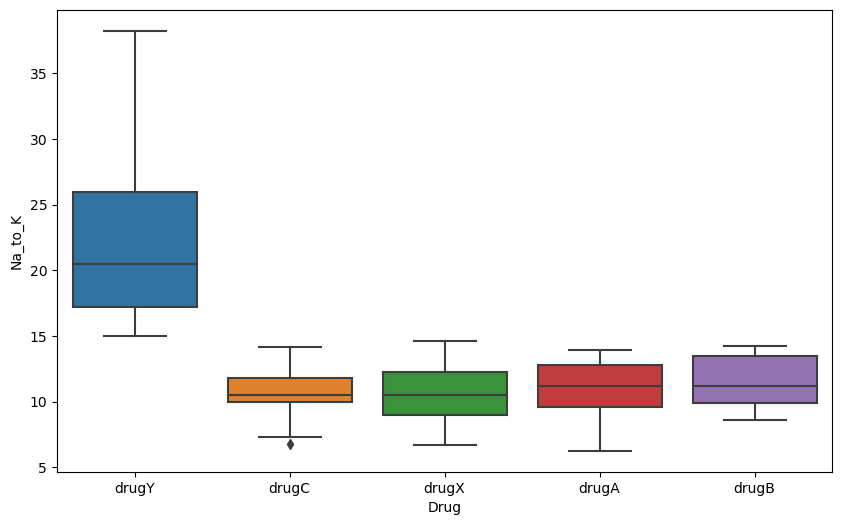

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x= "Drug", y="Na_to_K", data = df)
plt.show()

<a id="subsection-one"></a>
## One Hot Encoder for categorical features

In [8]:
# Select categorical features
drugs_cat = df[['Sex', 'BP', 'Cholesterol']]

# Perform one-hot encoding
cat_encoder = OneHotEncoder(drop='first')
cat_1hot = cat_encoder.fit_transform(drugs_cat)

In [9]:
#View the encoding
cat_1hot.toarray()[0:5]

array([[0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [10]:
# Get the feature names after one-hot encoding
cat_feature_names = cat_encoder.get_feature_names_out(drugs_cat.columns)

# Create a new dataframe with the encoded features and feature names
df_encoded = pd.concat([df.drop(['Sex', 'BP', 'Cholesterol'], axis=1), pd.DataFrame(cat_1hot.toarray(), columns=cat_feature_names)], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop('Drug', axis=1)
y = df_encoded['Drug']

df_encoded

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,0.0,0.0,0.0,0.0
1,47,13.093,drugC,1.0,1.0,0.0,0.0
2,47,10.114,drugC,1.0,1.0,0.0,0.0
3,28,7.798,drugX,0.0,0.0,1.0,0.0
4,61,18.043,drugY,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0.0,1.0,0.0,0.0
196,16,12.006,drugC,1.0,1.0,0.0,0.0
197,52,9.894,drugX,1.0,0.0,1.0,0.0
198,23,14.020,drugX,1.0,0.0,1.0,1.0


<a id="section-two"></a>
## Visualizing the Decision Tree

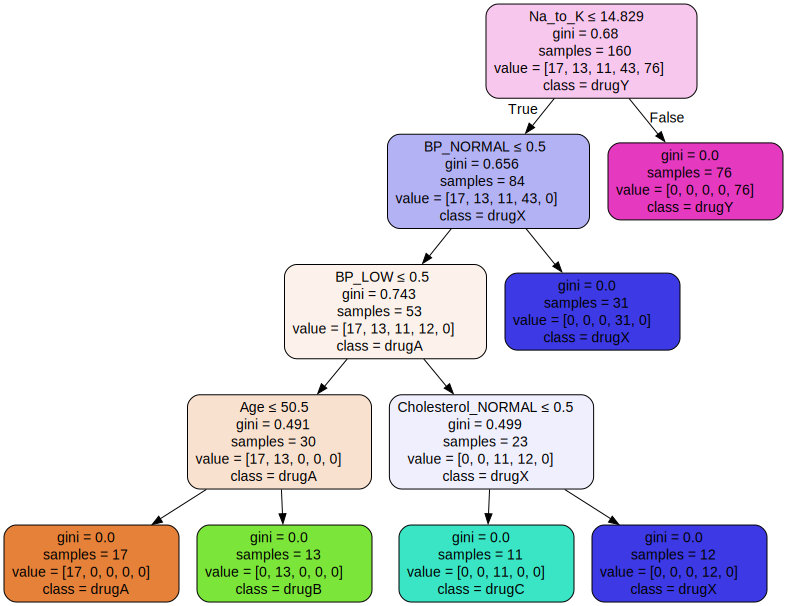

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Plot decision tree
dot_data = export_graphviz(clf, feature_names=X.columns, class_names=clf.classes_,
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # Save the tree as a PDF file
graph

In [13]:
class_names=clf.classes_
class_names

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

In [14]:
'''# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=list(X.columns), class_names=clf.classes_, filled=True)
plt.show()

#Note that left node arrows are True, right node arrows are False'''

'# Visualize the decision tree\nplt.figure(figsize=(12, 8))\ntree.plot_tree(clf, feature_names=list(X.columns), class_names=clf.classes_, filled=True)\nplt.show()\n\n#Note that left node arrows are True, right node arrows are False'

<a id="anything-you-like"></a>
## Visualizations

Accuracy: 1.0


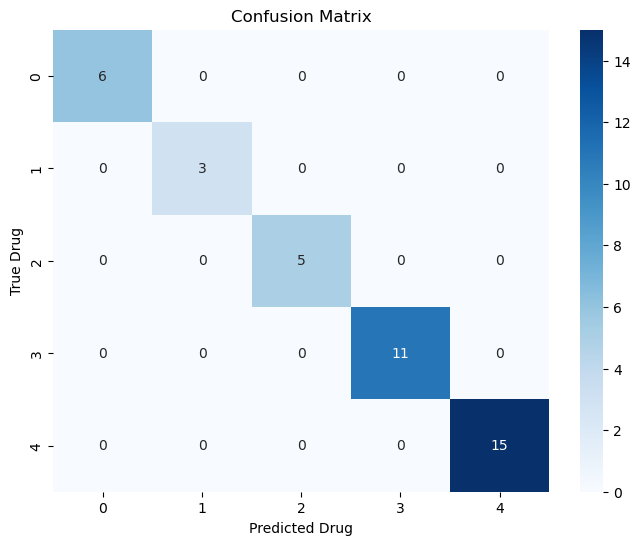

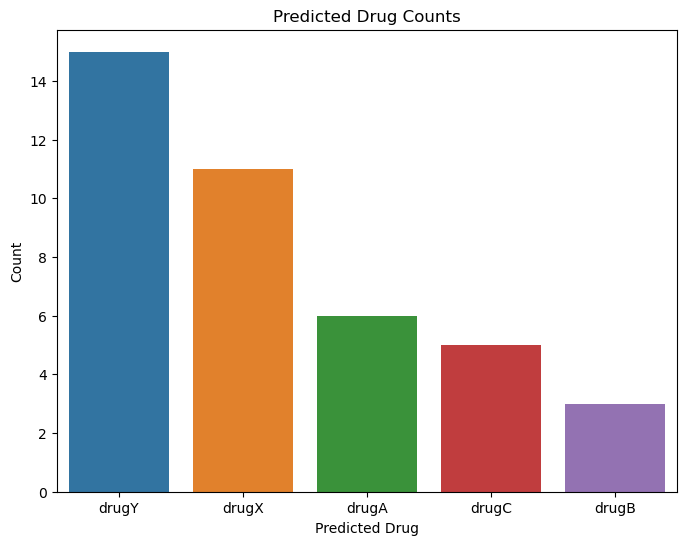

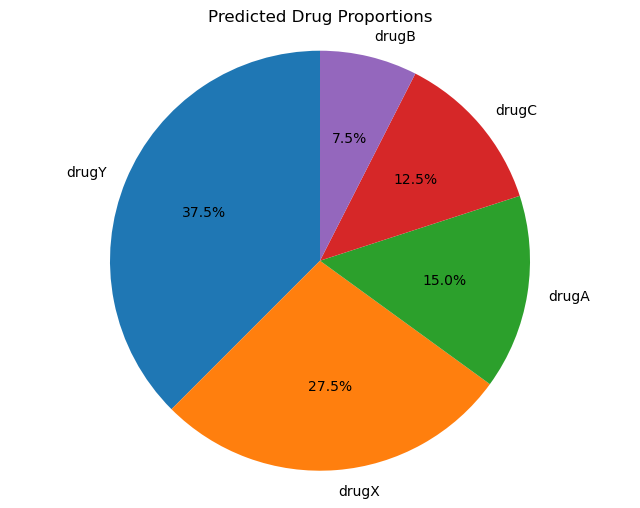

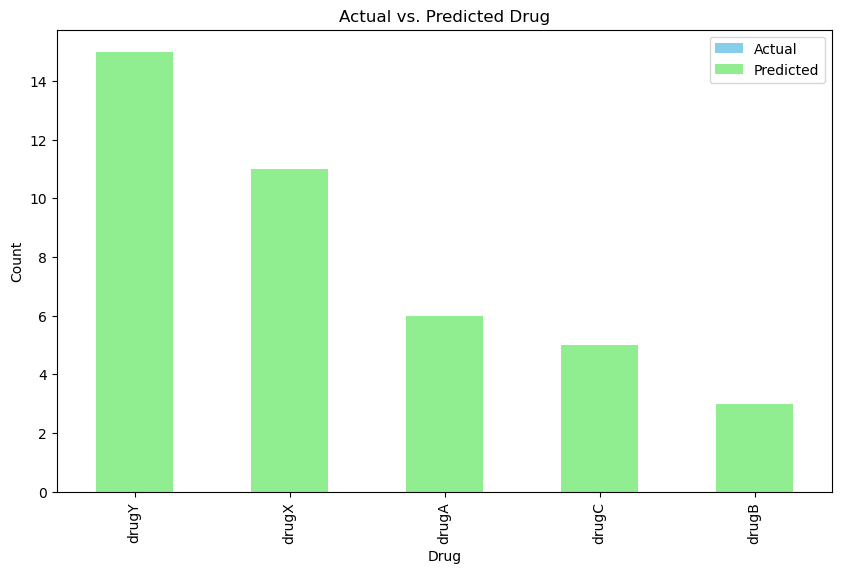

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Convert numpy arrays to pandas Series
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Drug')
plt.ylabel('True Drug')
plt.title('Confusion Matrix')
plt.show()

# Plot bar chart of predicted drug counts
plt.figure(figsize=(8, 6))
y_pred_counts = y_pred.value_counts()
sns.barplot(x=y_pred_counts.index, y=y_pred_counts.values)
plt.xlabel('Predicted Drug')
plt.ylabel('Count')
plt.title('Predicted Drug Counts')
plt.show()

# Plot pie chart of predicted drug proportions
plt.figure(figsize=(8, 6))
y_pred_proportions = y_pred.value_counts(normalize=True)
plt.pie(y_pred_proportions, labels=y_pred_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Drug Proportions')
plt.axis('equal')
plt.show()

# Plot actual vs. predicted drug comparison
plt.figure(figsize=(10, 6))
ax = y_test.value_counts().plot(kind='bar', color='skyblue', label='Actual')
y_pred.value_counts().plot(kind='bar', color='lightgreen', label='Predicted')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Drug')
plt.legend()
plt.show()

<a id="section-three"></a>
## Conclusion:
In this analysis, I delved into a dataset encompassing patients who shared the same illness and responded to various medications. By leveraging key features such as age, sex, blood pressure, cholesterol levels, and the Sodium-Potassium ratio (Na_to_K), I constructed a decision tree model to predict the most suitable drug for future patients with similar conditions. My findings shed light on crucial insights that can significantly impact medical decision-making and patient care.

Firstly, I discovered that drug Y emerges as the drug of choice for patients whose Sodium-Potassium levels exceed 14.8. This finding implies that individuals with higher Sodium-Potassium ratios tend to respond favorably to drug Y, making it a preferred medication in such cases. This insight holds immense value in tailoring treatment plans to optimize patient outcomes and improve their overall well-being.

Additionally, I observed that drug X is primarily administered to patients with high blood pressure. This insight highlights the importance of considering specific patient characteristics, such as blood pressure levels, to determine the appropriate medication. By identifying drug X as the recommended choice for individuals with high blood pressure, we can enhance the precision and efficacy of treatment regimens.

By incorporating these findings into medical practice, healthcare professionals can make more informed decisions when prescribing medications to patients with similar illnesses. This personalized approach based on individual patient attributes can potentially lead to improved treatment outcomes, reduced adverse effects, and enhanced patient satisfaction.

Through the application of data analysis and machine learning techniques, this study contributes to the advancement of personalized medicine. By harnessing the power of algorithms and leveraging comprehensive datasets, I can optimize treatment strategies, minimize trial-and-error approaches, and ultimately improve the quality of life for patients. These findings underscore the pivotal role that data-driven approaches play in shaping the future of healthcare and highlight the immense potential for further research and advancements in medical decision-making.